# Ajuste de parámetros


In [1]:
#Import libraries
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#Load data
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
print(X.shape)

(442, 10)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [4]:
n_estimators = 2000
est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1)
est.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

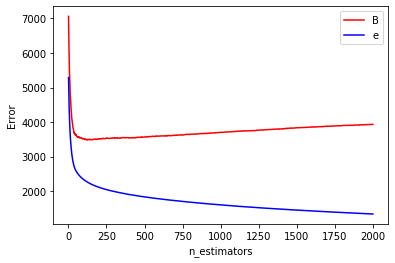

In [5]:
test_score = np.empty(len(est.estimators_))
for i,pred in enumerate(est.staged_predict(X_test)):
    test_score[i] = est.loss_(y_test, pred)
plt.plot(np.arange(n_estimators) + 1, test_score, label='Test',color='r')
plt.plot(np.arange(n_estimators) + 1, est.train_score_, label='Train',color='b')
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.legend('Best')

Para hacer un tunning de los hiperparámetros, hay que seguir los siguientes pasos:

    - Poner el número de estimadores lo más alto posible, por ej, 3000
    - Utilizar grid_search para ajustar los hyperparámetros
    - Por último, fijar un valor más alto incluso de n_estimators y ajustar el learning rate

In [6]:
from sklearn.model_selection import GridSearchCV
n_estimators = 3000
param_grid = {'learning_rate':[0.1,0.05,0.02,0.01],
             'max_depth':[4,6],
              'min_samples_leaf':[3,5,9,17],
             'max_features': [1.0,0.3,0.1]}

est = GradientBoostingRegressor(n_estimators=n_estimators)
gs_cv = GridSearchCV(est, param_grid).fit(X_train, y_train)

gs_cv.best_params_


{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 0.1,
 'min_samples_leaf': 3}